## META-ANALYSIS: Applying a Random Effects Model with inverse variance weighting 

##### summary of the steps undertaken:
    1. Import data (previously generated Hedges' G values and Variances (Vg values))
    2. Calculate Combined (Mean) Effect size (M*) for each MGI gene symbol
    3. Calculate Z-scores and p values for each gene symbol

  es = effect sizes, imported from indexed file (Hedges g)
  
  W = weight  (inverse of Variance in Hedges g)
  $$  {W\ } = \frac{1}{var}$$
  
  M* = Combined (mean) effect size
  
  W* = weighting in random effects model (inverse of study variance + between studies variance)
   $$ {W^*\ } = \frac{1}{var + Tau^2} $$
  

With

$$  {Tau^2\ } = \frac{Q - df}{C}  $$  

Where:

$${ Q\ }= \sum{es^2*W} - \frac{(\sum{es*W})^2}{\sum{W}} $$


$$ C= \sum{W} -\frac{\sum{W^2}}{\sum{W}} $$ 

and I squared statistic (heterogeneity within the meta-analysis, see Higgins et al 2003 BMJ, 327:557-60)
$$  {I^2\ } = \frac{Q^2 - df}{Q}  $$  

## set up 

In [1]:
import pandas as pd # Dataframes and File IO
import numpy as np # numerical calculations
import matplotlib.pyplot as plt # Plotting
import scipy.stats as st # statistical package (p_vals)
%matplotlib inline

In [2]:
df=pd.read_csv('input_files/Symbol_forMeta.csv', index_col=0)# import indexed values from studies in meta-analysis 
df.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_WB_AK_Var_g,430AV2_WB_AK_SEg,430AV2_WB_B6_Enrich,430AV2_WB_B6_Hedges_g,430AV2_WB_B6_Var_g,430AV2_WB_B6_SEg,430AV2_WB_D2_Enrich,430AV2_WB_D2_Hedges_g,430AV2_WB_D2_Var_g,430AV2_WB_D2_SEg
0610005C13Rik,0.228652,1.254299,0.612772,0.782798,0.089680,0.902413,0.549529,0.741302,-0.074648,-0.313418,...,0.514103,0.717009,0.020797,0.168026,0.484019,0.695715,-0.018220,-0.163728,0.483901,0.695630
0610007P14Rik,-0.038639,-0.752437,0.528847,0.727219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610008F07Rik,0.359300,0.837987,0.540185,0.734973,-0.040547,-0.177167,0.484282,0.695904,0.010761,0.040622,...,0.637592,0.798494,0.161643,0.428478,0.496966,0.704958,-0.141627,-0.603248,0.511992,0.715536
0610009B14Rik,0.062553,0.344874,0.491578,0.701126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,-0.145335,-0.583642,0.510053,0.714180,0.062817,0.616777,0.513368,0.716497,0.085935,0.218759,...,0.570048,0.755015,-0.014903,-0.076177,0.482150,0.694370,-0.014010,-0.075992,0.482148,0.694369


# Calculations: Weightings

 W = weight  (inverse of Variance in Hedges g)
  $$ \frac{1}{var}$$
  

In [3]:
df['MoEx_CerCx_W_1'] = 1/df['MoEx_CerCx_Var_g'] # weight as 1/variance
df['430AV2_CerCx_3h_W_2'] = 1/df['430AV2_CerCx_3h_Var_g']
df['430AV2_CerCx_6h_W_3'] = 1/df['430AV2_CerCx_6h_Var_g']
df['430AV2_CerCx_9h_W_4'] = 1/df['430AV2_CerCx_9h_Var_g']
df['430AV2_CerCx_12h_W_5'] = 1/df['430AV2_CerCx_12h_Var_g']
df['430AV2_ForeOlig_W_6'] = 1/df['430AV2_ForeOlig_Var_g'] # next 5
df['430AV2_ForeNonOlig_W_7'] = 1/df['430AV2_ForeNonOlig_Var_g']
df['430AV2_Hipp_W_8'] = 1/df['430AV2_Hipp_Var_g']
df['430AV2_HypoT_3h_W_9'] = 1/df['430AV2_HypoT_3h_Var_g']
df['430AV2_HypoT_6h_W_10'] = 1/df['430AV2_HypoT_6h_Var_g']
df['430AV2_HypoT_9h_W_11'] = 1/df['430AV2_HypoT_9h_Var_g'] # next 5
df['430AV2_HypoT_12h_W_12'] = 1/df['430AV2_HypoT_12h_Var_g']
df['430AV2_Astro_W_13'] = 1/df['430AV2_Astro_Var_g']
df['430AV2_NonAstro_W_14'] = 1/df['430AV2_NonAstro_Var_g']
df['430AV2_WB_AK_W_15'] = 1/df['430AV2_WB_AK_Var_g']
df['430AV2_WB_B6_W_16'] = 1/df['430AV2_WB_B6_Var_g'] # next 5
df['430AV2_WB_D2_W_17'] = 1/df['430AV2_WB_D2_Var_g']
df['430AV2_ZT12_AK_W_18'] = 1/df['430AV2_ZT12_AK_Var_g']
df['430AV2_ZT12_B6_W_19'] = 1/df['430AV2_ZT12_B6_Var_g']
df['430AV2_ZT12_D2_W_20'] = 1/df['430AV2_ZT12_D2_Var_g']
df['430AV2_ZT6_AK_W_21'] = 1/df['430AV2_ZT6_AK_Var_g'] # last 3
df['430AV2_ZT6_B6_W_22'] = 1/df['430AV2_ZT6_B6_Var_g']
df['430AV2_ZT6_D2_W_23'] = 1/df['430AV2_ZT6_D2_Var_g']

In [4]:
##reset count
#count = 1

##up to but excluding 6 (therefore includes 5)
#while count<6:
#    # redefine the prefix each time
#    prefix_filt = prefixes[count-1]
#    #populate df with weightings as 1/variance
#    df[(prefix_filt+'W_'+ str(count))] = 1/df.filter(regex= prefix_filt+"Var_g")
#    #increase count by 1
#    count = count +1
    
##check that worked 
#df.head()

# Squared weightings
$$ C= \sum{W} -\frac{\sum{W^2}}{\sum{W}} $$ 

In [5]:
df['MoEx_CerCx_SqW_1'] = np.square(df['MoEx_CerCx_W_1']) # square weights
df['430AV2_CerCx_3h_SqW_2'] = np.square(df['430AV2_CerCx_3h_W_2'])
df['430AV2_CerCx_6h_SqW_3'] = np.square(df['430AV2_CerCx_6h_W_3'])
df['430AV2_CerCx_9h_SqW_4'] = np.square(df['430AV2_CerCx_9h_W_4'])
df['430AV2_CerCx_12h_SqW_5'] = np.square(df['430AV2_CerCx_12h_W_5'])
df['430AV2_ForeOlig_SqW_6'] = np.square(df['430AV2_ForeOlig_W_6']) # next 5
df['430AV2_ForeNonOlig_SqW_7'] = np.square(df['430AV2_ForeNonOlig_W_7'])
df['430AV2_Hipp_SqW_8'] = np.square(df['430AV2_Hipp_W_8'])
df['430AV2_HypoT_3h_SqW_9'] = np.square(df['430AV2_HypoT_3h_W_9'])
df['430AV2_HypoT_6h_SqW_10'] = np.square(df['430AV2_HypoT_6h_W_10'])
df['430AV2_HypoT_9h_SqW_11'] = np.square(df['430AV2_HypoT_9h_W_11']) # next 5
df['430AV2_HypoT_12h_SqW_12'] = np.square(df['430AV2_HypoT_12h_W_12'])
df['430AV2_Astro_SqW_13'] = np.square(df['430AV2_Astro_W_13'])
df['430AV2_NonAstro_SqW_14'] = np.square(df['430AV2_NonAstro_W_14'])
df['430AV2_WB_AK_SqW_15'] = np.square(df['430AV2_WB_AK_W_15'])
df['430AV2_WB_B6_SqW_16'] = np.square(df['430AV2_WB_B6_W_16']) # next 5
df['430AV2_WB_D2_SqW_17'] = np.square(df['430AV2_WB_D2_W_17'])
df['430AV2_ZT12_AK_SqW_18'] = np.square(df['430AV2_ZT12_AK_W_18'])
df['430AV2_ZT12_B6_SqW_19'] = np.square(df['430AV2_ZT12_B6_W_19'])
df['430AV2_ZT12_D2_SqW_20'] = np.square(df['430AV2_ZT12_D2_W_20'])
df['430AV2_ZT6_AK_SqW_21'] = np.square(df['430AV2_ZT6_AK_W_21']) # last 3
df['430AV2_ZT6_B6_SqW_22'] = np.square(df['430AV2_ZT6_B6_W_22'])
df['430AV2_ZT6_D2_SqW_23'] = np.square(df['430AV2_ZT6_D2_W_23'])

In [6]:
##reset count
#count = 1

##up to but excluding 6 (therefore includes 5)
#while count<6:
#    #redefine the prefix each time
#    prefix_filt = prefixes[count-1]
#    #populate df with squared weightings as square of W#
#    df[(prefix_filt+'SqW_'+ str(count))] = np.square(df.filter(regex= prefix_filt+'W_'+ str(count)))
#    #increase count by 1
#    count = count +1
    
##check that worked 
#df.head()

In [7]:
df.shape

(28219, 138)

# Effect size^2 x weightings
$${ Q\ }= \sum{es^2*W} - \frac{(\sum{es*W})^2}{\sum{W}} $$
The first part of the equation, where es is squared and multiplied by W


In [8]:
df['MoEx_CerCx_SqEsW_1'] = np.square(df['MoEx_CerCx_Hedges_g']*df['MoEx_CerCx_W_1']) # weight as np.square(variance)
df['430AV2_CerCx_3h_SqEsW_2'] = np.square(df['430AV2_CerCx_3h_Hedges_g']*df['430AV2_CerCx_3h_W_2'])
df['430AV2_CerCx_6h_SqEsW_3'] = np.square(df['430AV2_CerCx_6h_Hedges_g']*df['430AV2_CerCx_6h_W_3'])
df['430AV2_CerCx_9h_SqEsW_4'] = np.square(df['430AV2_CerCx_9h_Hedges_g']*df['430AV2_CerCx_9h_W_4'])
df['430AV2_CerCx_12h_SqEsW_5'] = np.square(df['430AV2_CerCx_12h_Hedges_g']*df['430AV2_CerCx_12h_W_5'])
df['430AV2_ForeOlig_SqEsW_6'] = np.square(df['430AV2_ForeOlig_Hedges_g']*df['430AV2_ForeOlig_W_6']) # next 5
df['430AV2_ForeNonOlig_SqEsW_7'] = np.square(df['430AV2_ForeNonOlig_Hedges_g']*df['430AV2_ForeNonOlig_W_7'])
df['430AV2_Hipp_SqEsW_8'] = np.square(df['430AV2_Hipp_Hedges_g']*df['430AV2_Hipp_W_8'])
df['430AV2_HypoT_3h_SqEsW_9'] = np.square(df['430AV2_HypoT_3h_Hedges_g']*df['430AV2_HypoT_3h_W_9'])
df['430AV2_HypoT_6h_SqEsW_10'] = np.square(df['430AV2_HypoT_6h_Hedges_g']*df['430AV2_HypoT_6h_W_10'])
df['430AV2_HypoT_9h_SqEsW_11'] = np.square(df['430AV2_HypoT_9h_Hedges_g']*df['430AV2_HypoT_9h_W_11']) # next 5
df['430AV2_HypoT_12h_SqEsW_12'] = np.square(df['430AV2_HypoT_12h_Hedges_g']*df['430AV2_HypoT_12h_W_12'])
df['430AV2_Astro_SqEsW_13'] = np.square(df['430AV2_Astro_Hedges_g']*df['430AV2_Astro_W_13'])
df['430AV2_NonAstro_SqEsW_14'] = np.square(df['430AV2_NonAstro_Hedges_g']*df['430AV2_NonAstro_W_14'])
df['430AV2_WB_AK_SqEsW_15'] = np.square(df['430AV2_WB_AK_Hedges_g']*df['430AV2_WB_AK_W_15'])
df['430AV2_WB_B6_SqEsW_16'] = np.square(df['430AV2_WB_B6_Hedges_g']*df['430AV2_WB_B6_W_16']) # next 5
df['430AV2_WB_D2_SqEsW_17'] = np.square(df['430AV2_WB_D2_Hedges_g']*df['430AV2_WB_D2_W_17'])
df['430AV2_ZT12_AK_SqEsW_18'] = np.square(df['430AV2_ZT12_AK_Hedges_g']*df['430AV2_ZT12_AK_W_18'])
df['430AV2_ZT12_B6_SqEsW_19'] = np.square(df['430AV2_ZT12_B6_Hedges_g']*df['430AV2_ZT12_B6_W_19'])
df['430AV2_ZT12_D2_SqEsW_20'] = np.square(df['430AV2_ZT12_D2_Hedges_g']*df['430AV2_ZT12_D2_W_20'])
df['430AV2_ZT6_AK_SqEsW_21'] = np.square(df['430AV2_ZT6_AK_Hedges_g']*df['430AV2_ZT6_AK_W_21']) # last 3
df['430AV2_ZT6_B6_SqEsW_22'] = np.square(df['430AV2_ZT6_B6_Hedges_g']*df['430AV2_ZT6_B6_W_22'])
df['430AV2_ZT6_D2_SqEsW_23'] = np.square(df['430AV2_ZT6_D2_Hedges_g']*df['430AV2_ZT6_D2_W_23'])
df.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_NonAstro_SqEsW_14,430AV2_WB_AK_SqEsW_15,430AV2_WB_B6_SqEsW_16,430AV2_WB_D2_SqEsW_17,430AV2_ZT12_AK_SqEsW_18,430AV2_ZT12_B6_SqEsW_19,430AV2_ZT12_D2_SqEsW_20,430AV2_ZT6_AK_SqEsW_21,430AV2_ZT6_B6_SqEsW_22,430AV2_ZT6_D2_SqEsW_23
0610005C13Rik,0.228652,1.254299,0.612772,0.782798,0.089680,0.902413,0.549529,0.741302,-0.074648,-0.313418,...,2.471972,1.472679,0.120512,0.114481,2.070576,3.059949,0.220320,3.762128,2.818761,2.696679
0610007P14Rik,-0.038639,-0.752437,0.528847,0.727219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610008F07Rik,0.359300,0.837987,0.540185,0.734973,-0.040547,-0.177167,0.484282,0.695904,0.010761,0.040622,...,1.667928,4.602696,0.743366,1.388239,4.782051,3.648090,0.418778,0.068785,2.006810,0.133835
0610009B14Rik,0.062553,0.344874,0.491578,0.701126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,-0.145335,-0.583642,0.510053,0.714180,0.062817,0.616777,0.513368,0.716497,0.085935,0.218759,...,0.510111,3.263766,0.024963,0.024841,1.972039,0.861478,4.888883,4.290606,1.204026,1.443442


# Effect size x weighting
$${ Q\ }= \sum{es^2*W} - \frac{(\sum{es*W})^2}{\sum{W}} $$
The numberator in the secind part if the equation, where es is multiplied by W


In [9]:
df['MoEx_CerCx_esW_1'] = df['MoEx_CerCx_Hedges_g']*df['MoEx_CerCx_W_1'] # first 5
df['430AV2_CerCx_3h_esW_2'] = df['430AV2_CerCx_3h_Hedges_g']*df['430AV2_CerCx_3h_W_2']
df['430AV2_CerCx_6h_esW_3'] = df['430AV2_CerCx_6h_Hedges_g']*df['430AV2_CerCx_6h_W_3']
df['430AV2_CerCx_9h_esW_4'] = df['430AV2_CerCx_9h_Hedges_g']*df['430AV2_CerCx_9h_W_4']
df['430AV2_CerCx_12h_esW_5'] = df['430AV2_CerCx_12h_Hedges_g']*df['430AV2_CerCx_12h_W_5']
df['430AV2_ForeOlig_esW_6'] = df['430AV2_ForeOlig_Hedges_g']*df['430AV2_ForeOlig_W_6'] # next 5
df['430AV2_ForeNonOlig_esW_7'] = df['430AV2_ForeNonOlig_Hedges_g']*df['430AV2_ForeNonOlig_W_7']
df['430AV2_Hipp_esW_8'] = df['430AV2_Hipp_Hedges_g']*df['430AV2_Hipp_W_8']
df['430AV2_HypoT_3h_esW_9'] = df['430AV2_HypoT_3h_Hedges_g']*df['430AV2_HypoT_3h_W_9']
df['430AV2_HypoT_6h_esW_10'] = df['430AV2_HypoT_6h_Hedges_g']*df['430AV2_HypoT_6h_W_10']
df['430AV2_HypoT_9h_esW_11'] = df['430AV2_HypoT_9h_Hedges_g']*df['430AV2_HypoT_9h_W_11'] # next 5
df['430AV2_HypoT_12h_esW_12'] = df['430AV2_HypoT_12h_Hedges_g']*df['430AV2_HypoT_12h_W_12']
df['430AV2_Astro_esW_13'] = df['430AV2_Astro_Hedges_g']*df['430AV2_Astro_W_13']
df['430AV2_NonAstro_esW_14'] = df['430AV2_NonAstro_Hedges_g']*df['430AV2_NonAstro_W_14']
df['430AV2_WB_AK_esW_15'] = df['430AV2_WB_AK_Hedges_g']*df['430AV2_WB_AK_W_15']
df['430AV2_WB_B6_esW_16'] = df['430AV2_WB_B6_Hedges_g']*df['430AV2_WB_B6_W_16'] # next 5
df['430AV2_WB_D2_esW_17'] = df['430AV2_WB_D2_Hedges_g']*df['430AV2_WB_D2_W_17']
df['430AV2_ZT12_AK_esW_18'] = df['430AV2_ZT12_AK_Hedges_g']*df['430AV2_ZT12_AK_W_18']
df['430AV2_ZT12_B6_esW_19'] = df['430AV2_ZT12_B6_Hedges_g']*df['430AV2_ZT12_B6_W_19']
df['430AV2_ZT12_D2_esW_20'] = df['430AV2_ZT12_D2_Hedges_g']*df['430AV2_ZT12_D2_W_20']
df['430AV2_ZT6_AK_esW_21'] = df['430AV2_ZT6_AK_Hedges_g']*df['430AV2_ZT6_AK_W_21'] # last 3
df['430AV2_ZT6_B6_esW_22'] = df['430AV2_ZT6_B6_Hedges_g']*df['430AV2_ZT6_B6_W_22']
df['430AV2_ZT6_D2_esW_23'] = df['430AV2_ZT6_D2_Hedges_g']*df['430AV2_ZT6_D2_W_23']
df.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_NonAstro_esW_14,430AV2_WB_AK_esW_15,430AV2_WB_B6_esW_16,430AV2_WB_D2_esW_17,430AV2_ZT12_AK_esW_18,430AV2_ZT12_B6_esW_19,430AV2_ZT12_D2_esW_20,430AV2_ZT6_AK_esW_21,430AV2_ZT6_B6_esW_22,430AV2_ZT6_D2_esW_23
0610005C13Rik,0.228652,1.254299,0.612772,0.782798,0.089680,0.902413,0.549529,0.741302,-0.074648,-0.313418,...,1.572251,-1.213540,0.347148,-0.338350,1.438949,1.749271,-0.469382,-1.939620,1.678917,1.642157
0610007P14Rik,-0.038639,-0.752437,0.528847,0.727219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610008F07Rik,0.359300,0.837987,0.540185,0.734973,-0.040547,-0.177167,0.484282,0.695904,0.010761,0.040622,...,-1.291483,2.145389,0.862187,-1.178236,-2.186790,1.909997,0.647130,0.262268,1.416619,-0.365835
0610009B14Rik,0.062553,0.344874,0.491578,0.701126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,-0.145335,-0.583642,0.510053,0.714180,0.062817,0.616777,0.513368,0.716497,0.085935,0.218759,...,0.714221,1.806590,-0.157995,-0.157611,1.404293,0.928158,2.211082,2.071378,1.097281,1.201433


In [10]:
#for each row count degrees of freedom as 'Hedges_g' colums with data in, -1
#any regular expression that will 
df['degf'] = df.filter(regex='Var_g').count(axis=1)-1 

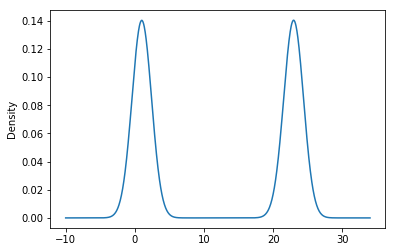

In [11]:
#df.filter(items=['MoEx_CerCx_Var_g','430AV2_CerCx_3h_Var_g','430AV2_CerCx_6h_Var_g','430AV2_CerCx_9h_Var_g','430AV2_CerCx_12h_Var_g','430AV2_ForeOlig_','430AV2_ForeNonOlig_','430AV2_Hipp_','430AV2_HypoT_3h_','430AV2_HypoT_6h_','430AV2_HypoT_9h_','430AV2_HypoT_12h_','430AV2_Astro_','430AV2_NonAstro_','430AV2_WB_AK_','430AV2_WB_B6_','430AV2_WB_D2_','430AV2_ZT12_AK_','430AV2_ZT12_B6_','430AV2_ZT12_D2_','430AV2_ZT6_AK_','430AV2_ZT6_B6_','430AV2_ZT6_D2_']).count(axis=1).plot(kind='kde')
df.filter(regex='Var_g').count(axis=1).plot(kind='kde')

## Full equations of Q and C

$${ Q\ }= \sum{es^2*W} - \frac{(\sum{es*W})^2}{\sum{W}} $$

To do the full calculation for Q we call the sum of SqEsW (first part after "=") Qa.
The numberator in the fraction is Qb.
The denominator in the fraction is Qc.

$$ C= \sum{W} -\frac{\sum{W^2}}{\sum{W}} $$ 

To calculate C, we call the first part Qc as it is identical. The numerator is Cd. the denominator is again Qc.

In [12]:
Qa = df.filter(regex='_SqEsW_').sum(axis=1)
Qb = np.square(df.filter(regex='_esW_').sum(axis=1))
Qc = df.filter(regex='_W_').sum(axis=1)  
Cd =  df.filter(regex='_SqW_').sum(axis=1)


In [13]:
df['Q'] = Qa -(Qb/Qc)
df['C'] = Qc -(Cd/Qc)

## Calculating Tau^2
$$  {Tau^2\ } = \frac{Q - degf}{C}  $$  

In [14]:
df['Tau^2'] = (df['Q']-df['degf'])/df['C']
df['Tau^2'].where(df['Tau^2']>0, 0,inplace=True) # set Tau-squared to 0 where <0
df['Tau^2'].where(df['Tau^2']<100000, 0,inplace=True) # set Tau-squared to 0 where err or inf
df.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_ZT12_AK_esW_18,430AV2_ZT12_B6_esW_19,430AV2_ZT12_D2_esW_20,430AV2_ZT6_AK_esW_21,430AV2_ZT6_B6_esW_22,430AV2_ZT6_D2_esW_23,degf,Q,C,Tau^2
0610005C13Rik,0.228652,1.254299,0.612772,0.782798,0.089680,0.902413,0.549529,0.741302,-0.074648,-0.313418,...,1.438949,1.749271,-0.469382,-1.939620,1.678917,1.642157,22,61.749180,54.270661,0.732425
0610007P14Rik,-0.038639,-0.752437,0.528847,0.727219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.953768,0.000000,0.000000
0610008F07Rik,0.359300,0.837987,0.540185,0.734973,-0.040547,-0.177167,0.484282,0.695904,0.010761,0.040622,...,-2.186790,1.909997,0.647130,0.262268,1.416619,-0.365835,22,54.304954,53.768725,0.600813
0610009B14Rik,0.062553,0.344874,0.491578,0.701126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.250242,0.000000,0.000000
0610009B22Rik,-0.145335,-0.583642,0.510053,0.714180,0.062817,0.616777,0.513368,0.716497,0.085935,0.218759,...,1.404293,0.928158,2.211082,2.071378,1.097281,1.201433,22,68.710296,52.323815,0.892716


## Calculating the I^2 statistic
$$  {I^2\ } = \frac{Q^2 - degf}{Q}  $$  

In [15]:
df['I^2'] = (np.square(df['Q'])-df['degf'])/df['Q']
df['I^2'].where(df['I^2']>0, 0,inplace=True)   # set I-squared to 0 where <0
df['I^2'].where(df['I^2']<100000, 0,inplace=True)  # set I-squared to 0 where err or inf

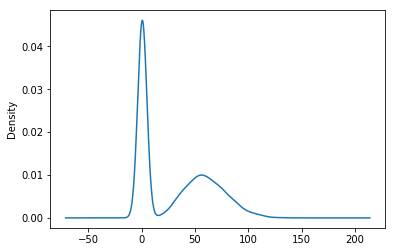

In [16]:
df['I^2'].plot(kind='kde')  # have a look at distribution of I-squared values

## Calculating W* 
W* = weighting in Random Effects Model(REM) (inverse of study variance + between studies variance)
   $$ \frac{1}{var + Tau^2} $$

In [17]:
df['MoEx_CerCx_W*_1'] = 1/(df['MoEx_CerCx_Var_g']+ df['Tau^2'])  # weighting for each study under REM
df['430AV2_CerCx_3h_W*_2'] = 1/(df['430AV2_CerCx_3h_Var_g']+ df['Tau^2'])
df['430AV2_CerCx_6h_W*_3'] = 1/(df['430AV2_CerCx_6h_Var_g']+ df['Tau^2'])
df['430AV2_CerCx_9h_W*_4'] = 1/(df['430AV2_CerCx_9h_Var_g']+ df['Tau^2'])
df['430AV2_CerCx_12h_W*_5'] = 1/(df['430AV2_CerCx_12h_Var_g']+ df['Tau^2'])
df['430AV2_ForeOlig_W*_6'] = 1/(df['430AV2_ForeOlig_Var_g']+ df['Tau^2']) # next 5
df['430AV2_ForeNonOlig_W*_7'] = 1/(df['430AV2_ForeNonOlig_Var_g']+ df['Tau^2'])
df['430AV2_Hipp_W*_8'] = 1/(df['430AV2_Hipp_Var_g']+ df['Tau^2'])
df['430AV2_HypoT_3h_W*_9'] = 1/(df['430AV2_HypoT_3h_Var_g']+ df['Tau^2'])
df['430AV2_HypoT_6h_W*_10'] = 1/(df['430AV2_HypoT_6h_Var_g']+ df['Tau^2'])
df['430AV2_HypoT_9h_W*_11'] = 1/(df['430AV2_HypoT_9h_Var_g']+ df['Tau^2']) # next 5
df['430AV2_HypoT_12h_W*_12'] = 1/(df['430AV2_HypoT_12h_Var_g']+ df['Tau^2'])
df['430AV2_Astro_W*_13'] = 1/(df['430AV2_Astro_Var_g']+ df['Tau^2'])
df['430AV2_NonAstro_W*_14'] = 1/(df['430AV2_NonAstro_Var_g']+ df['Tau^2'])
df['430AV2_WB_AK_W*_15'] = 1/(df['430AV2_WB_AK_Var_g']+ df['Tau^2'])
df['430AV2_WB_B6_W*_16'] = 1/(df['430AV2_WB_B6_Var_g']+ df['Tau^2']) # next 5
df['430AV2_WB_D2_W*_17'] = 1/(df['430AV2_WB_D2_Var_g']+ df['Tau^2'])
df['430AV2_ZT12_AK_W*_18'] = 1/(df['430AV2_ZT12_AK_Var_g']+ df['Tau^2'])
df['430AV2_ZT12_B6_W*_19'] = 1/(df['430AV2_ZT12_B6_Var_g']+ df['Tau^2'])
df['430AV2_ZT12_D2_W*_20'] = 1/(df['430AV2_ZT12_D2_Var_g']+ df['Tau^2'])
df['430AV2_ZT6_AK_W*_21'] = 1/(df['430AV2_ZT6_AK_Var_g']+ df['Tau^2']) # last 3
df['430AV2_ZT6_B6_W*_22'] = 1/(df['430AV2_ZT6_B6_Var_g']+ df['Tau^2'])
df['430AV2_ZT6_D2_W*_23'] = 1/(df['430AV2_ZT6_D2_Var_g']+ df['Tau^2'])
df.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_NonAstro_W*_14,430AV2_WB_AK_W*_15,430AV2_WB_B6_W*_16,430AV2_WB_D2_W*_17,430AV2_ZT12_AK_W*_18,430AV2_ZT12_B6_W*_19,430AV2_ZT12_D2_W*_20,430AV2_ZT6_AK_W*_21,430AV2_ZT6_B6_W*_22,430AV2_ZT6_D2_W*_23
0610005C13Rik,0.228652,1.254299,0.612772,0.782798,0.089680,0.902413,0.549529,0.741302,-0.074648,-0.313418,...,0.686213,0.802229,0.822068,0.822148,0.792022,0.698059,0.820730,0.755461,0.707621,0.780059
0610007P14Rik,-0.038639,-0.752437,0.528847,0.727219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610008F07Rik,0.359300,0.837987,0.540185,0.734973,-0.040547,-0.177167,0.484282,0.695904,0.010761,0.040622,...,0.798965,0.807490,0.910930,0.898630,0.799434,0.387585,0.916708,0.922665,0.812665,0.921578
0610009B14Rik,0.062553,0.344874,0.491578,0.701126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,-0.145335,-0.583642,0.510053,0.714180,0.062817,0.616777,0.513368,0.716497,0.085935,0.218759,...,0.677056,0.683637,0.727344,0.727345,0.704182,0.083881,0.644810,0.661762,0.673357,0.711195


## Calculating effect size x W* 

In [18]:
df['MoEx_CerCx_esW*_1'] = df['MoEx_CerCx_Hedges_g']*df['MoEx_CerCx_W*_1'] # weighted effect sizes for each study
df['430AV2_CerCx_3h_esW*_2'] = df['430AV2_CerCx_3h_Hedges_g']*df['430AV2_CerCx_3h_W*_2']
df['430AV2_CerCx_6h_esW*_3'] = df['430AV2_CerCx_6h_Hedges_g']*df['430AV2_CerCx_6h_W*_3']
df['430AV2_CerCx_9h_esW*_4'] = df['430AV2_CerCx_9h_Hedges_g']*df['430AV2_CerCx_9h_W*_4']
df['430AV2_CerCx_12h_esW*_5'] = df['430AV2_CerCx_12h_Hedges_g']*df['430AV2_CerCx_12h_W*_5']
df['430AV2_ForeOlig_esW*_6'] = df['430AV2_ForeOlig_Hedges_g']*df['430AV2_ForeOlig_W*_6'] # next 5
df['430AV2_ForeNonOlig_esW*_7'] = df['430AV2_ForeNonOlig_Hedges_g']*df['430AV2_ForeNonOlig_W*_7']
df['430AV2_Hipp_esW*_8'] = df['430AV2_Hipp_Hedges_g']*df['430AV2_Hipp_W*_8']
df['430AV2_HypoT_3h_esW*_9'] = df['430AV2_HypoT_3h_Hedges_g']*df['430AV2_HypoT_3h_W*_9']
df['430AV2_HypoT_6h_esW*_10'] = df['430AV2_HypoT_6h_Hedges_g']*df['430AV2_HypoT_6h_W*_10']
df['430AV2_HypoT_9h_esW*_11'] = df['430AV2_HypoT_9h_Hedges_g']*df['430AV2_HypoT_9h_W*_11'] # next 5
df['430AV2_HypoT_12h_esW*_12'] = df['430AV2_HypoT_12h_Hedges_g']*df['430AV2_HypoT_12h_W*_12']
df['430AV2_Astro_esW*_13'] = df['430AV2_Astro_Hedges_g']*df['430AV2_Astro_W*_13']
df['430AV2_NonAstro_esW*_14'] = df['430AV2_NonAstro_Hedges_g']*df['430AV2_NonAstro_W*_14']
df['430AV2_WB_AK_esW*_15'] = df['430AV2_WB_AK_Hedges_g']*df['430AV2_WB_AK_W*_15']
df['430AV2_WB_B6_esW*_16'] = df['430AV2_WB_B6_Hedges_g']*df['430AV2_WB_B6_W*_16'] # next 5
df['430AV2_WB_D2_esW*_17'] = df['430AV2_WB_D2_Hedges_g']*df['430AV2_WB_D2_W*_17']
df['430AV2_ZT12_AK_esW*_18'] = df['430AV2_ZT12_AK_Hedges_g']*df['430AV2_ZT12_AK_W*_18']
df['430AV2_ZT12_B6_esW*_19'] = df['430AV2_ZT12_B6_Hedges_g']*df['430AV2_ZT12_B6_W*_19']
df['430AV2_ZT12_D2_esW*_20'] = df['430AV2_ZT12_D2_Hedges_g']*df['430AV2_ZT12_D2_W*_20']
df['430AV2_ZT6_AK_esW*_21'] = df['430AV2_ZT6_AK_Hedges_g']*df['430AV2_ZT6_AK_W*_21'] # last 3
df['430AV2_ZT6_B6_esW*_22'] = df['430AV2_ZT6_B6_Hedges_g']*df['430AV2_ZT6_B6_W*_22']
df['430AV2_ZT6_D2_esW*_23'] = df['430AV2_ZT6_D2_Hedges_g']*df['430AV2_ZT6_D2_W*_23']
df.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_NonAstro_esW*_14,430AV2_WB_AK_esW*_15,430AV2_WB_B6_esW*_16,430AV2_WB_D2_esW*_17,430AV2_ZT12_AK_esW*_18,430AV2_ZT12_B6_esW*_19,430AV2_ZT12_D2_esW*_20,430AV2_ZT6_AK_esW*_21,430AV2_ZT6_B6_esW*_22,430AV2_ZT6_D2_esW*_23
0610005C13Rik,0.228652,1.254299,0.612772,0.782798,0.089680,0.902413,0.549529,0.741302,-0.074648,-0.313418,...,0.782038,-0.500498,0.138129,-0.134609,0.604219,0.854911,-0.187226,-0.866393,0.808770,0.703936
0610007P14Rik,-0.038639,-0.752437,0.528847,0.727219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610008F07Rik,0.359300,0.837987,0.540185,0.734973,-0.040547,-0.177167,0.484282,0.695904,0.010761,0.040622,...,-0.671534,1.104552,0.390313,-0.542096,-1.136452,1.465223,0.290710,0.116880,0.724941,-0.163274
0610009B14Rik,0.062553,0.344874,0.491578,0.701126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,-0.145335,-0.583642,0.510053,0.714180,0.062817,0.616777,0.513368,0.716497,0.085935,0.218759,...,0.282532,0.704039,-0.055407,-0.055272,0.521506,0.858656,0.938311,0.847679,0.437688,0.438649


### Then sum these weighted effect sizes and weightings

In [19]:
Ma = df.filter(regex='esW\*').sum(axis=1)  # careful to not summate esW values 
Mb = df.filter(regex='_W\*').sum(axis=1)
 

df['REM_M*'] = Ma/Mb
df['REM_SEM*'] = np.sqrt(1/Mb)
df['REM_Z'] = df['REM_M*']/df['REM_SEM*']

In [20]:
df['REM_pVal'] = st.norm.sf(abs(df['REM_Z']))*2 # two-sided p-value from Z scores

In [21]:
df.shape

(28219, 239)

In [22]:
# import ENSMBL mouse GIDs and descriptions again
dfX=pd.read_table('../BioMart_Ensmbl_index/mart_export72_MGIsymbol.txt',index_col=[2])  
dfX.head()

,Ensembl Gene ID,Description
MGI symbol,,
Rpl22l1,ENSMUSG00000039221,ribosomal protein L22 like 1 [Source:MGI Symbo...
Gm10597,ENSMUSG00000095611,predicted gene 10597 [Source:MGI Symbol;Acc:MG...
Ext1,ENSMUSG00000061731,exostoses (multiple) 1 [Source:MGI Symbol;Acc:...
Smcr7,ENSMUSG00000018599,"Smith-Magenis syndrome chromosome region, cand..."
Gm7792,ENSMUSG00000094722,predicted gene 7792 [Source:MGI Symbol;Acc:MGI...


In [23]:
dfX.drop_duplicates(inplace=True)

In [24]:
df_FINAL = df.join(dfX, how='left', sort=True)
df_FINAL2 =df_FINAL[df_FINAL.index.duplicated()!=True]

In [25]:
df_FINAL2.shape  # check same number of rows as input file

(28219, 241)

In [26]:
df_FINAL2.to_csv('input_files/meta_out_Symbol(REM).csv')

## The p-values from this study will be used to compute q-values using the qvals R package (or web frontend at http://qvalue.princeton.edu/ ) then returned:
  

In [27]:
import scipy as sp
from scipy import interpolate


def estimate(pv, m=None, verbose=False, lowmem=False, pi0=None):
    """
    Estimates q-values from p-values
    Args
    =====
    m: number of tests. If not specified m = pv.size
    verbose: print verbose messages? (default False)
    lowmem: use memory-efficient in-place algorithm
    pi0: if None, it's estimated as suggested in Storey and Tibshirani, 2003.
         For most GWAS this is not necessary, since pi0 is extremely likely to be
         1
    """
    assert(pv.min() >= 0 and pv.max() <= 1), "p-values should be between 0 and 1"

    original_shape = pv.shape
    pv = pv.ravel()  # flattens the array in place, more efficient than flatten()

    if m is None:
        m = float(len(pv))
    else:
        # the user has supplied an m
        m *= 1.0

    # if the number of hypotheses is small, just set pi0 to 1
    if len(pv) < 100 and pi0 is None:
        pi0 = 1.0
    elif pi0 is not None:
        pi0 = pi0
    else:
        # evaluate pi0 for different lambdas
        pi0 = []
        lam = sp.arange(0, 0.90, 0.01)
        counts = sp.array([(pv > i).sum() for i in sp.arange(0, 0.9, 0.01)])
        for l in range(len(lam)):
            pi0.append(counts[l]/(m*(1-lam[l])))

        pi0 = sp.array(pi0)

        # fit natural cubic spline
        tck = interpolate.splrep(lam, pi0, k=3)
        pi0 = interpolate.splev(lam[-1], tck)
        if verbose:
            print("qvalues pi0=%.3f, estimated proportion of null features " % pi0)

        if pi0 > 1:
            if verbose:
                print("got pi0 > 1 (%.3f) while estimating qvalues, setting it to 1" % pi0)
            pi0 = 1.0

    assert(pi0 >= 0 and pi0 <= 1), "pi0 is not between 0 and 1: %f" % pi0

    if lowmem:
        # low memory version, only uses 1 pv and 1 qv matrices
        qv = sp.zeros((len(pv),))
        last_pv = pv.argmax()
        qv[last_pv] = (pi0*pv[last_pv]*m)/float(m)
        pv[last_pv] = -sp.inf
        prev_qv = last_pv
        for i in range(int(len(pv))-2, -1, -1):
            cur_max = pv.argmax()
            qv_i = (pi0*m*pv[cur_max]/float(i+1))
            pv[cur_max] = -sp.inf
            qv_i1 = prev_qv
            qv[cur_max] = min(qv_i, qv_i1)
            prev_qv = qv[cur_max]

    else:
        p_ordered = sp.argsort(pv)
        pv = pv[p_ordered]
        qv = pi0 * m/len(pv) * pv
        qv[-1] = min(qv[-1], 1.0)

        for i in range(len(pv)-2, -1, -1):
            qv[i] = min(pi0*m*pv[i]/(i+1.0), qv[i+1])

        # reorder qvalues
        qv_temp = qv.copy()
        qv = sp.zeros_like(qv)
        qv[p_ordered] = qv_temp

    # reshape qvalues
    qv = qv.reshape(original_shape)

    return qv

In [28]:
df_FINAL2.loc[:,'q-value'] =estimate(df_FINAL2['REM_pVal'])

/Users/Ella1/anaconda3/envs/NARv3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Ella1/anaconda3/envs/NARv3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
df_FINAL3 =df_FINAL2[df_FINAL2.loc[:,'q-value']<0.01]

In [30]:
df_FINAL3.sort_values('REM_M*', inplace=True, ascending=False)
df_FINAL3.shape

/Users/Ella1/anaconda3/envs/NARv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(498, 242)

In [31]:
df_FINAL3.to_csv('input_files/meta_out_Symbol(REM)_pythonQs.csv')
df_FINAL3.head()

,MoEx_CerCx_Enrich,MoEx_CerCx_Hedges_g,MoEx_CerCx_Var_g,MoEx_CerCx_SEg,430AV2_ZT6_D2_Enrich,430AV2_ZT6_D2_Hedges_g,430AV2_ZT6_D2_Var_g,430AV2_ZT6_D2_SEg,430AV2_Astro_Enrich,430AV2_Astro_Hedges_g,...,430AV2_ZT6_AK_esW*_21,430AV2_ZT6_B6_esW*_22,430AV2_ZT6_D2_esW*_23,REM_M*,REM_SEM*,REM_Z,REM_pVal,Ensembl Gene ID,Description,q-value
Hspa5,0.796333,9.991844,8.801412,2.966717,0.391073,3.356249,1.420367,1.191792,0.604684,1.468095,...,1.215575,1.072101,1.148088,3.356715,0.368344,9.112986,8.014535e-20,ENSMUSG00000026864,heat shock protein 5 [Source:MGI Symbol;Acc:MG...,3.395249e-16
Creld2,0.652848,3.398393,1.444089,1.201703,0.436043,3.133245,1.299769,1.140074,0.780108,1.988555,...,0.798393,1.013567,1.003486,3.061473,0.369983,8.274636,1.288489e-16,ENSMUSG00000023272,cysteine-rich with EGF-like domains 2 [Source:...,4.548758e-13
Chordc1,0.369503,5.309889,2.831243,1.682630,0.350577,2.564127,1.029562,1.014673,0.403591,0.805901,...,0.873621,0.693886,0.909139,2.832547,0.356183,7.952513,1.827661e-15,ENSMUSG00000001774,cysteine and histidine-rich domain (CHORD)-con...,5.530456e-12
Tra2a,0.509514,6.221302,3.707050,1.925370,0.277803,2.680792,1.080554,1.039497,0.803309,2.224881,...,0.344178,0.931541,0.794196,2.611518,0.387590,6.737837,1.607619e-11,ENSMUSG00000029817,transformer 2 alpha homolog (Drosophila) [Sour...,2.643547e-08
Manf,0.524882,5.532577,3.032451,1.741393,0.481697,3.064735,1.264383,1.124448,0.436052,1.014986,...,1.061665,0.837053,0.923884,2.578549,0.382773,6.736503,1.622434e-11,ENSMUSG00000032575,mesencephalic astrocyte-derived neurotrophic f...,2.643547e-08


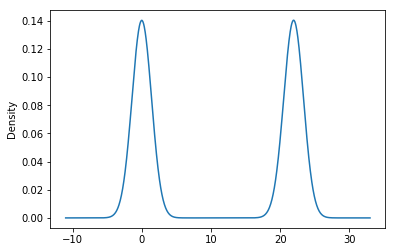

In [32]:
df['degf'].plot(kind="kde")